In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [308]:
df = pd.read_excel("new_data_preprocessed.xlsx", parse_dates=True, index_col='Timestamp')
df

,IP Address,Minimum Memory Used,weekday
Timestamp,,,
2023-01-22 20:00:00,10.16.11.252,14.69,Sunday
2023-01-22 20:00:00,10.16.11.101,14.12,Sunday
2023-01-22 20:00:00,10.16.11.22,11.99,Sunday
2023-01-22 20:00:00,10.16.11.75,15.23,Sunday
2023-01-22 20:00:00,10.16.11.77,15.10,Sunday
...,...,...,...
2023-02-07 19:00:00,10.16.11.80,16.03,Tuesday
2023-02-07 19:00:00,10.16.11.83,15.64,Tuesday
2023-02-07 19:00:00,10.16.11.84,15.51,Tuesday


In [309]:
mean = df["Minimum Memory Used"].mean()
std = df["Minimum Memory Used"].std()


In [310]:
upper_bound = mean + 2 * std
lower_bound = mean - 2 * std
anomalies = df[(df["Minimum Memory Used"] > upper_bound) | (df["Minimum Memory Used"] < lower_bound)]
#df = df.drop(anomalies.index)
#anomalies['Minimum Memory Used']
# replace values in column 'A'
#df['Minimum Memory Used'].replace(anomalies['Minimum Memory Used'].values, None)
#df.isnull()
#df['Minimum Memory Used'].unique()
#df
#linear interpolation ,missing value imputation


In [311]:
df['Minimum Memory Used']=df['Minimum Memory Used'].replace(anomalies['Minimum Memory Used'].values, np.NaN)
df.isnull()


,IP Address,Minimum Memory Used,weekday
Timestamp,,,
2023-01-22 20:00:00,False,False,False
2023-01-22 20:00:00,False,False,False
2023-01-22 20:00:00,False,True,False
2023-01-22 20:00:00,False,False,False
2023-01-22 20:00:00,False,False,False
...,...,...,...
2023-02-07 19:00:00,False,False,False
2023-02-07 19:00:00,False,False,False
2023-02-07 19:00:00,False,False,False


In [312]:
df['Minimum Memory Used']=df['Minimum Memory Used'].interpolate()
df

,IP Address,Minimum Memory Used,weekday
Timestamp,,,
2023-01-22 20:00:00,10.16.11.252,14.690,Sunday
2023-01-22 20:00:00,10.16.11.101,14.120,Sunday
2023-01-22 20:00:00,10.16.11.22,14.675,Sunday
2023-01-22 20:00:00,10.16.11.75,15.230,Sunday
2023-01-22 20:00:00,10.16.11.77,15.100,Sunday
...,...,...,...
2023-02-07 19:00:00,10.16.11.80,16.030,Tuesday
2023-02-07 19:00:00,10.16.11.83,15.640,Tuesday
2023-02-07 19:00:00,10.16.11.84,15.510,Tuesday


In [313]:
df = df[df['IP Address'] == '10.16.11.252']
df

,IP Address,Minimum Memory Used,weekday
Timestamp,,,
2023-01-22 20:00:00,10.16.11.252,14.69,Sunday
2023-01-22 21:00:00,10.16.11.252,14.63,Sunday
2023-01-22 22:00:00,10.16.11.252,15.13,Sunday
2023-01-22 23:00:00,10.16.11.252,14.80,Sunday
2023-01-23 00:00:00,10.16.11.252,15.26,Monday
...,...,...,...
2023-02-07 15:00:00,10.16.11.252,14.85,Tuesday
2023-02-07 16:00:00,10.16.11.252,15.34,Tuesday
2023-02-07 17:00:00,10.16.11.252,14.93,Tuesday


In [315]:
print(df['IP Address'].dtype)

object


In [ ]:
df.drop(['IP Address','weekday'], axis=1, inplace=True)
df

C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\231751222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['IP Address','weekday'], axis=1, inplace=True)


,Minimum Memory Used
Timestamp,
2023-01-22 20:00:00,14.69
2023-01-22 21:00:00,14.63
2023-01-22 22:00:00,15.13
2023-01-22 23:00:00,14.80
2023-01-23 00:00:00,15.26
...,...
2023-02-07 15:00:00,14.85
2023-02-07 16:00:00,15.34
2023-02-07 17:00:00,14.93


<AxesSubplot:xlabel='Timestamp'>

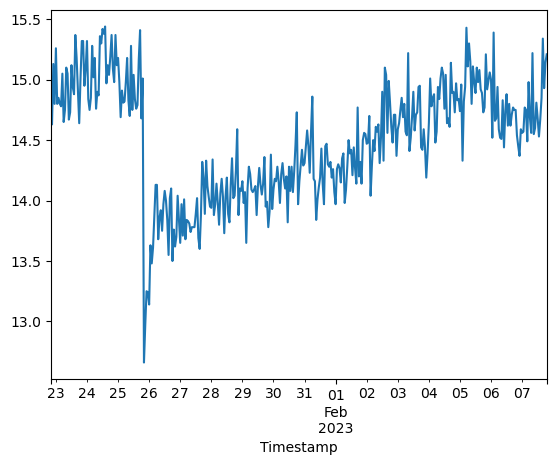

In [ ]:
df['Minimum Memory Used'].plot()

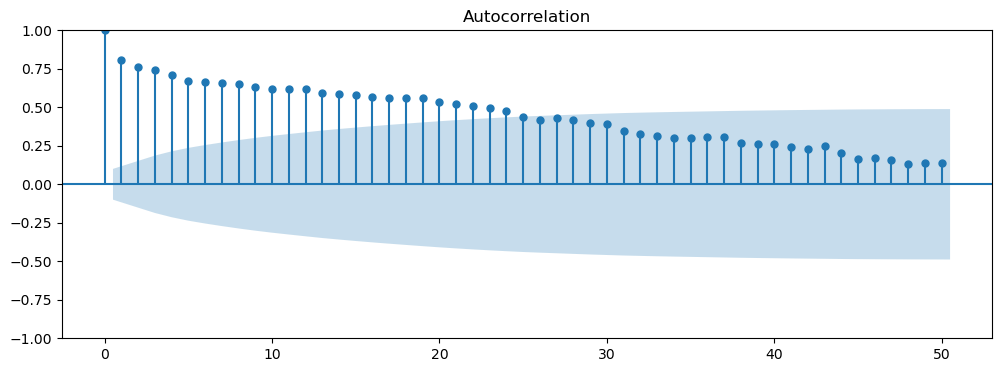

c:\Users\SaSingh\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


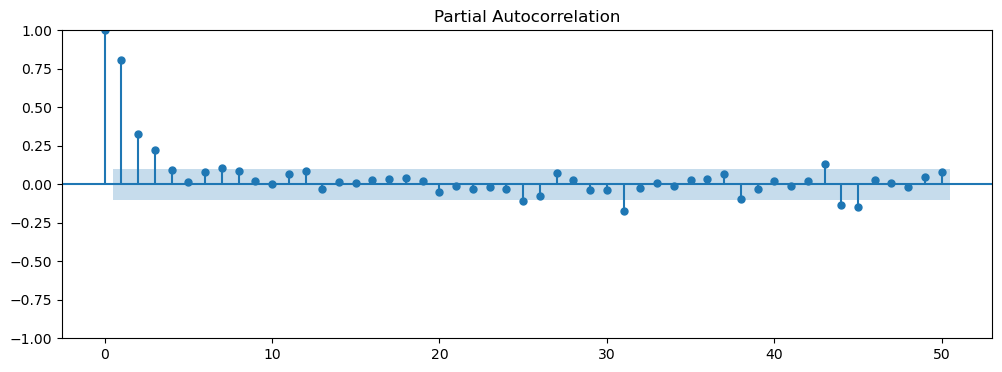

In [ ]:
ts = df['Minimum Memory Used']


fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(ts, lags=50, ax=ax)
plt.show()


fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_pacf(ts, lags=50, ax=ax)
plt.show()

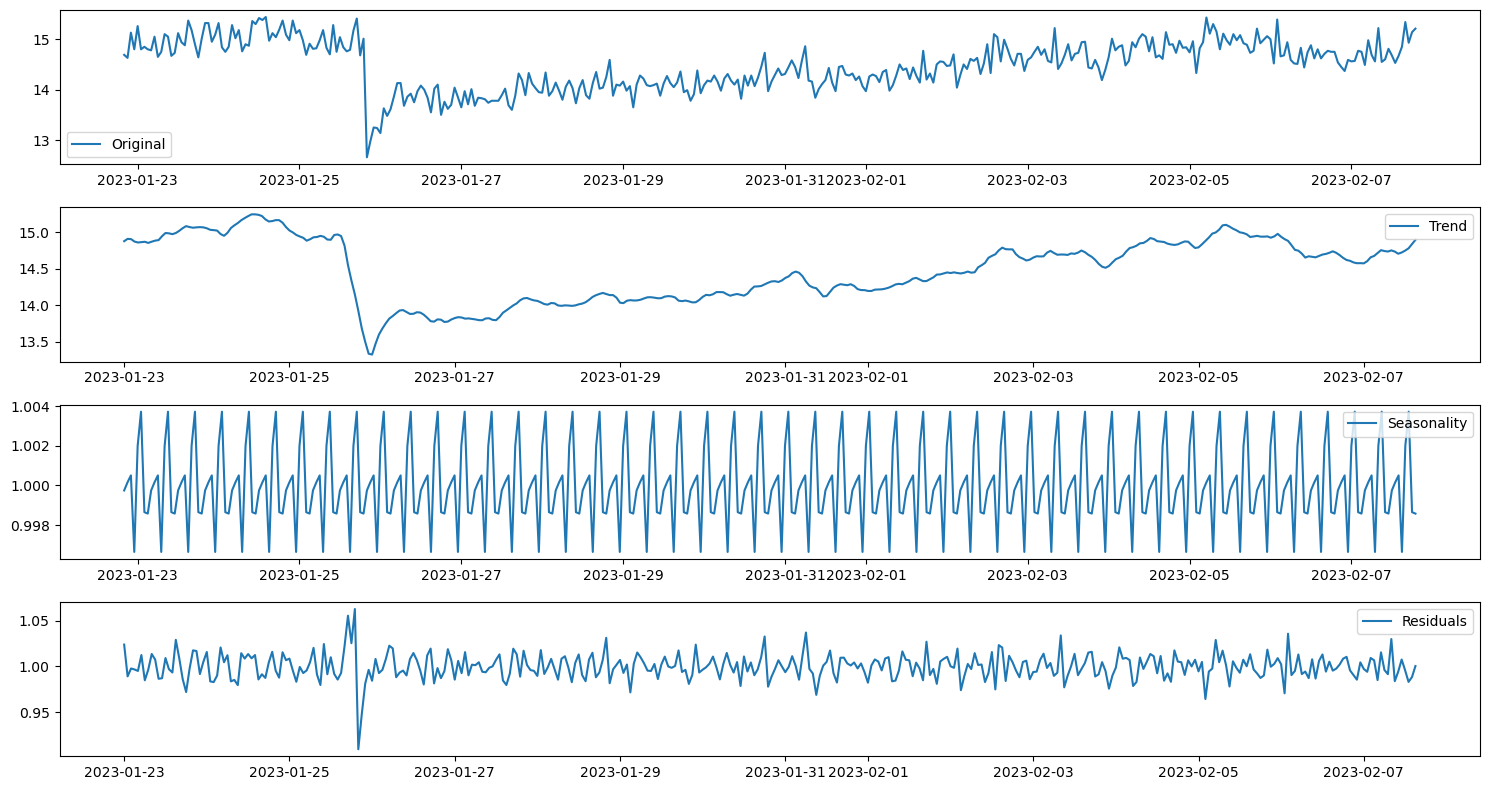

In [ ]:
decomposition = seasonal_decompose(df, model='multiplicative', period=8)


plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
df1['residuals'] = decomposition.resid
df1

,Minimum Memory Used,residuals
Timestamp,,
2023-01-22 20:00:00,14.69,NaN
2023-01-22 21:00:00,14.63,NaN
2023-01-22 22:00:00,15.13,NaN
2023-01-22 23:00:00,14.80,NaN
2023-01-23 00:00:00,15.26,1.023802
...,...,...
2023-02-07 15:00:00,14.85,1.000412
2023-02-07 16:00:00,15.34,NaN
2023-02-07 17:00:00,14.93,NaN


In [ ]:
df1=df1.fillna(0)
df1

,Minimum Memory Used,residuals
Timestamp,,
2023-01-22 20:00:00,14.69,0.000000
2023-01-22 21:00:00,14.63,0.000000
2023-01-22 22:00:00,15.13,0.000000
2023-01-22 23:00:00,14.80,0.000000
2023-01-23 00:00:00,15.26,1.023802
...,...,...
2023-02-07 15:00:00,14.85,1.000412
2023-02-07 16:00:00,15.34,0.000000
2023-02-07 17:00:00,14.93,0.000000


In [ ]:
df1['Final_value'] = df1['Minimum Memory Used'] - df1['residuals']
df1

,Minimum Memory Used,residuals,Final_value
Timestamp,,,
2023-01-22 20:00:00,14.69,0.000000,14.690000
2023-01-22 21:00:00,14.63,0.000000,14.630000
2023-01-22 22:00:00,15.13,0.000000,15.130000
2023-01-22 23:00:00,14.80,0.000000,14.800000
2023-01-23 00:00:00,15.26,1.023802,14.236198
...,...,...,...
2023-02-07 15:00:00,14.85,1.000412,13.849588
2023-02-07 16:00:00,15.34,0.000000,15.340000
2023-02-07 17:00:00,14.93,0.000000,14.930000


In [ ]:
from pmdarima.arima import auto_arima
X = auto_arima(df1['Final_value'], seasonal=True, suppress_warnings=True)
print(X.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  384
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -32.169
Date:                Thu, 02 Mar 2023   AIC                             70.338
Time:                        13:54:50   BIC                             82.182
Sample:                    01-22-2023   HQIC                            75.036
                         - 02-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2003      0.095      2.114      0.034       0.015       0.386
ma.L1         -0.6422      0.083     -7.735      0.000      -0.805      -0.479
sigma2         0.0692      0.002     39.676      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df1['Final_value'], order=X.order)
pred = arima_model.fit()

c:\Users\SaSingh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\SaSingh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\SaSingh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Timestamp'>

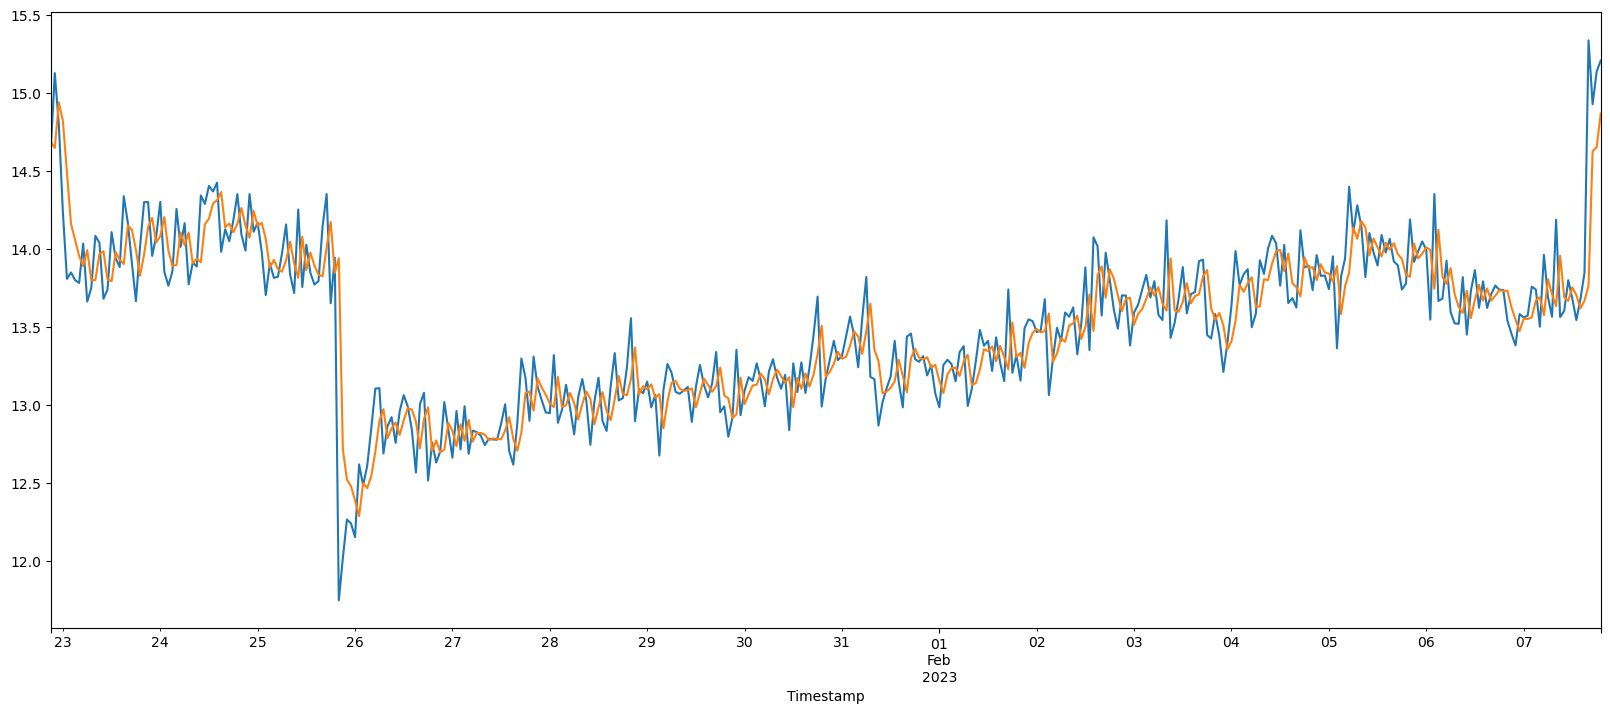

In [ ]:
plt.figure(figsize = (20,8))
df1['Final_value'][1:].plot()
pred.predict()[1:].plot()

In [ ]:
pred.forecast(24)
#save it in one variable as output=pred.forecast(24)
#plot outputvariable using plotly 
#then render plotly graph through streamlit

2023-02-07 20:00:00    15.005901
2023-02-07 21:00:00    14.965016
2023-02-07 22:00:00    14.956826
2023-02-07 23:00:00    14.955186
2023-02-08 00:00:00    14.954857
2023-02-08 01:00:00    14.954791
2023-02-08 02:00:00    14.954778
2023-02-08 03:00:00    14.954775
2023-02-08 04:00:00    14.954775
2023-02-08 05:00:00    14.954775
2023-02-08 06:00:00    14.954775
2023-02-08 07:00:00    14.954775
2023-02-08 08:00:00    14.954775
2023-02-08 09:00:00    14.954775
2023-02-08 10:00:00    14.954775
2023-02-08 11:00:00    14.954775
2023-02-08 12:00:00    14.954775
2023-02-08 13:00:00    14.954775
2023-02-08 14:00:00    14.954775
2023-02-08 15:00:00    14.954775
2023-02-08 16:00:00    14.954775
2023-02-08 17:00:00    14.954775
2023-02-08 18:00:00    14.954775
2023-02-08 19:00:00    14.954775
Freq: H, Name: predicted_mean, dtype: float64

In [ ]:
user_input = 12
forecast_values = []
for i in range(user_input):
    model = auto_arima(df1['Final_value'], seasonal=True, suppress_warnings=True)
    forecast3 = model.predict(n_periods=1)
    print(forecast3)
    forecast_values.append(forecast3.iloc[0])
    next_date = df1.index[-1] + pd.Timedelta(hours=1)
    df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-07 20:00:00    15.005901
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-07 21:00:00    14.897525
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-07 22:00:00    14.915071
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-07 23:00:00    14.918736
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-08    14.919501
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-08 01:00:00    14.91966
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-08 02:00:00    14.919692
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-08 03:00:00    14.919699
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-08 04:00:00    14.9197
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-08 05:00:00    14.9197
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-08 06:00:00    14.9197
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


2023-02-08 07:00:00    14.919699
Freq: H, dtype: float64


C:\Users\SaSingh\AppData\Local\Temp\ipykernel_2764\2803032488.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame((forecast3.iloc[0]), index=[next_date], columns=['Final_value']))


In [ ]:
df1

,Minimum Memory Used,residuals,Final_value
2023-01-22 20:00:00,14.69,0.000000,14.690000
2023-01-22 21:00:00,14.63,0.000000,14.630000
2023-01-22 22:00:00,15.13,0.000000,15.130000
2023-01-22 23:00:00,14.80,0.000000,14.800000
2023-01-23 00:00:00,15.26,1.023802,14.236198
...,...,...,...
2023-02-08 03:00:00,NaN,NaN,14.919699
2023-02-08 04:00:00,NaN,NaN,14.919700
2023-02-08 05:00:00,NaN,NaN,14.919700
2023-02-08 06:00:00,NaN,NaN,14.919700


In [ ]:
df1['Final_value'].iloc[279:]

2023-02-03 11:00:00    13.689814
2023-02-03 12:00:00    13.886312
2023-02-03 13:00:00    13.589582
2023-02-03 14:00:00    13.713046
2023-02-03 15:00:00    13.726342
                         ...    
2023-02-08 03:00:00    14.919699
2023-02-08 04:00:00    14.919700
2023-02-08 05:00:00    14.919700
2023-02-08 06:00:00    14.919700
2023-02-08 07:00:00    14.919699
Name: Final_value, Length: 117, dtype: float64

<AxesSubplot:>

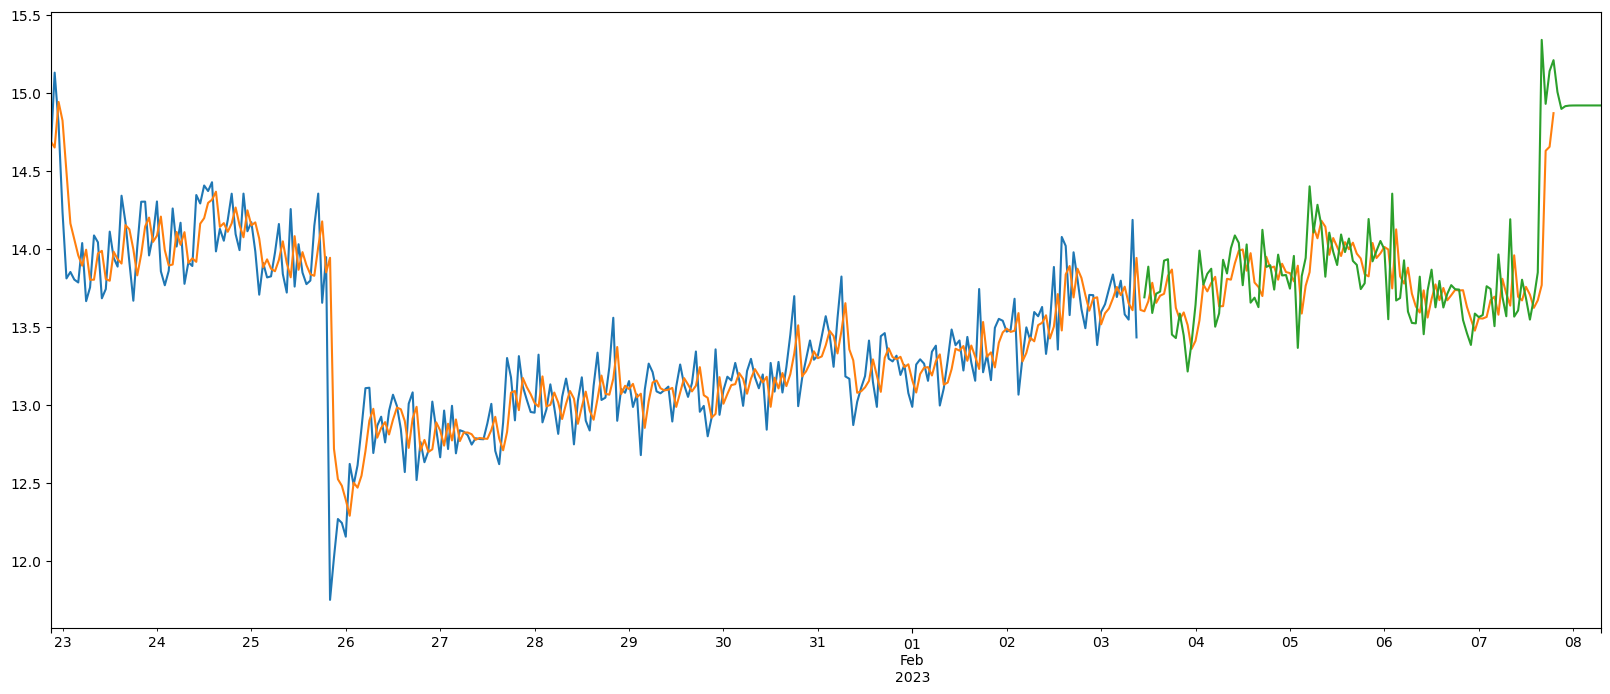

In [318]:
plt.figure(figsize = (20,8))
df1['Final_value'][1:278].plot()

pred.predict()[1:].plot()
df1['Final_value'].iloc[279:].plot()